# 1. Defining the Question


# a) Specifying the question


What are the demographic characterists that make an individual to have a bank account?






# b) Metrics of Success


Can successfully identify demographic Characterists that influence if an individual to have a bank account.



# c) Understanding the context

Across Africa access to a bank account has evaded a large number of individuals.

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

# d) Recording Experimental Design

The following will be the steps taken for recording experimental design:

1.   Define research question
2.   Data Exploration
3.   Univariate analysis
4.   Bivariate Analysis
5.   Multivariate Analysis
6.   Summary of Findings
7.   Challenging the solution
8.   Follow up Questions






# e) Relevance of the data

The data is relevant since it will help to understand the demographic characteristics that affect an individual to have a bank account. The insights from the analysis will help drive finanicial inclusion in Kenya, Rwanda, Uganda and Tanzania.

# Loading the data

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Load and Previewing the datasets**

In [2]:
#Loading the description data
df=pd.read_csv('http://bit.ly/VariableDefinitions')
df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
#Reading the datasets
data=pd.read_csv('http://bit.ly/FinancialDataset ')

In [4]:
#previewing the data
#Previewing the top of our dataset
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
#Checking the shape of the data 
data.shape
#The data has 23524 rows and 13 columns

(23524, 13)

In [7]:
#Getting the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
# Checking whether each column has an appropriate datatype
data.dtypes
#Our datasets has 3 numericical columns and 10 categorical columns.

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 2. Data Exploration

**Validation**

In [9]:
#Checking for duplicates
data.duplicated().sum()
#The datasets have no duplicated data

0

In [10]:
#Check for missing values
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
# Check for unique values in each column
for col in data.columns.to_list():
  print(f'{col} column unique values: \n')
  print(data[col].unique(), end='\n')
  print('...........')
  print('\n')

country column unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
...........


year column unique values: 

[2018 2029 2056 2016 2039 2017]
...........


uniqueid column unique values: 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
...........


Has a Bank account column unique values: 

['Yes' 'No' nan]
...........


Type of Location column unique values: 

['Rural' 'Urban' nan]
...........


Cell Phone Access column unique values: 

['Yes' 'No' nan]
...........


household_size column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
...........


Respondent Age column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95

# 3. Data Cleaning

# Anomilies

In [12]:
# Investigate rows with incorrect years
data[data['year'].isin([2029,2056,2039])]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [13]:
# Dropping erroneous year data
year_df = data[data['year'].isin([2029,2056,2039])].index
data.drop(index=year_df, inplace=True)
data['year'].unique()

array([2018, 2016, 2017])

In [14]:
#Renaming the Level of Education column name
data.rename(columns={'Level of Educuation': 'Level of Education'}, inplace=True)
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')

In [15]:
# Investigate rows with incorrect education data
data[data['Level of Education']=='6']

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Education,Type of Job
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,uniqueid_2159,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,uniqueid_3202,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,uniqueid_3877,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,uniqueid_4493,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,uniqueid_4700,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


In [16]:
# Drop erroneous education data
education = data[data['Level of Education']== '6'].index
data.drop(index=education, inplace=True)
data['Level of Education'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

Missing Values

In [17]:
#dropping all null values
data.dropna(inplace=True)
#Checking for null values
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Education        0
Type of Job               0
dtype: int64

In [18]:
#Re-check the shape of the datasets
data.shape

(23313, 13)

# Data Analysis

# Explorational Analysis

**Univarient Analysis**

No     20022
Yes     3291
Name: Has a Bank account, dtype: int64


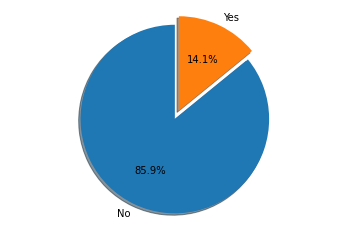

In [19]:
#Getting the proportion of the people with or without bank account
df_bank=data['Has a Bank account'].value_counts()
print(df_bank)
labels=['No', 'Yes']
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(df_bank, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

**Outliers**

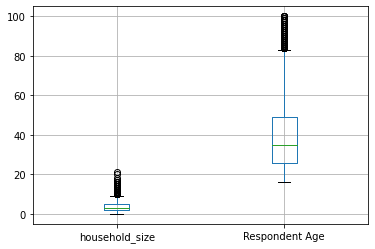

In [20]:
data.boxplot(column=['household_size', 'Respondent Age'])

In [21]:
# Check for outliers
col_names=['household_size','Respondent Age']
num_col = data[col_names]
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 -Q1

# print out the rows with outliers
l_bound=(num_col < (Q1 - 1.5 * IQR))
u_bound=(num_col > (Q3 + 1.5 * IQR))

outliers = num_col[l_bound|u_bound].any(axis=1)
index = outliers[outliers.values == True].index
data[data.index.isin(index)]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Education,Type of Job
34,Kenya,2018,uniqueid_35,No,Rural,Yes,10.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
92,Kenya,2018,uniqueid_93,Yes,Urban,Yes,10.0,21.0,Female,Parent,Single/Never Married,Tertiary education,Remittance Dependent
100,Kenya,2018,uniqueid_101,No,Urban,Yes,10.0,23.0,Female,Other relative,Divorced/Seperated,Primary education,Formally employed Private
209,Kenya,2018,uniqueid_210,No,Rural,No,3.0,95.0,Female,Parent,Widowed,No formal education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23461,Uganda,2018,uniqueid_2046,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,uniqueid_2053,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23471,Uganda,2018,uniqueid_2056,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23482,Uganda,2018,uniqueid_2070,No,Rural,No,10.0,18.0,Female,Parent,Married/Living together,Secondary education,Self employed


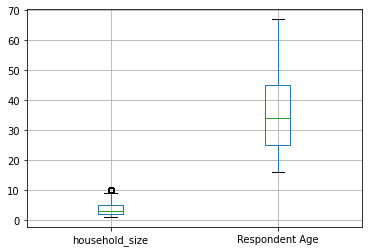

In [22]:
#The following shall be dropped:
  #Since a household size cant have less than 1 memeber, we shall drop any row with 0 and household with more than 10 household
  #Life expentancy is 67 in east africa, we shall use this as our upper bound and drop any other values 
  #Individuals less than 18 years cant open a bank account 
df_h=data[data['household_size'] <1].index.to_list()
df_hu=data[data['household_size'] >10].index.to_list()
df_a=data[data['Respondent Age']> 67].index.to_list()

to_drop = set(df_h + df_a+df_hu)
# Drop rows with identified indices
data.drop(index=to_drop, inplace=True)
data.boxplot(column=['household_size', 'Respondent Age'])

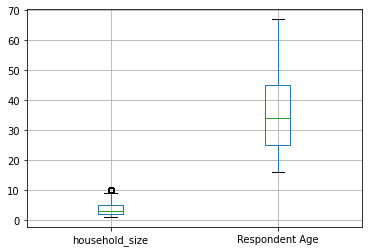

In [23]:
#visulize to check for outliers
data.boxplot(column=['household_size', 'Respondent Age'])

**Numerical Data**

Mean: 35.894228075091064
Mode: 0    30.0
dtype: float64
Median: 34.0
Kurtosis: -0.6383141623441353
Skewness: 0.5237533213517336


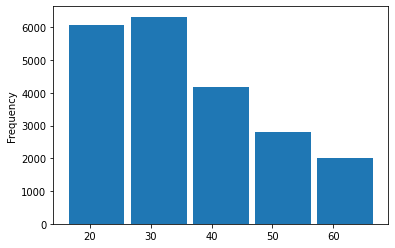

In [24]:
#Age
fig, ax = plt.subplots()
data['Respondent Age'].plot(ax=ax, kind='hist', bins=5, rwidth=0.9)
print('Mean:',data['Respondent Age'].mean())
print('Mode:',data['Respondent Age'].mode())
print('Median:',data['Respondent Age'].median())
print('Kurtosis:',data['Respondent Age'].kurt())
print('Skewness:',data['Respondent Age'].skew())

Observation:

*  The greatest number of respondent were aged between 30 and 40 years
*  Age is skewned to the right
*  Age has outliers hence it Leptokurtic



Household Size

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


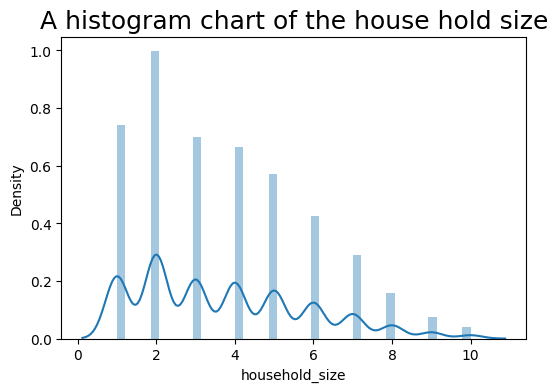

Mean: 35.894228075091064
Mode: 0    30.0
dtype: float64
Median: 34.0
Kurtosis: -0.6383141623441353
Skewness: 0.5237533213517336


In [25]:
plt.figure(dpi = 100)
sns.distplot(data['household_size'])
plt.title('A histogram chart of the house hold size', size = 18)
plt.show()
print('Mean:',data['Respondent Age'].mean())
print('Mode:',data['Respondent Age'].mode())
print('Median:',data['Respondent Age'].median())
print('Kurtosis:',data['Respondent Age'].kurt())
print('Skewness:',data['Respondent Age'].skew())

Observation:

*  Most household have 2 memebers
*  household is skewned to the right
*  household has outliers hence it Leptokurtic

In [26]:
#for i, col_val in enumerate(col_names):
 # print('Mean:',data[col_names].mean())
  #print('Mode:',data[col_names].mode())
  #print('Median:',data[col_names].median())
  #print('Kurtosis:',data[col_names].kurt())
  #print('Skewness:',data[col_names].skew())

**Categorical Data**

In [27]:
#Selecting the categorical columns
cat_cols = data.select_dtypes(include ='object').columns.to_list()
cat_cols

['country',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Education',
 'Type of Job']

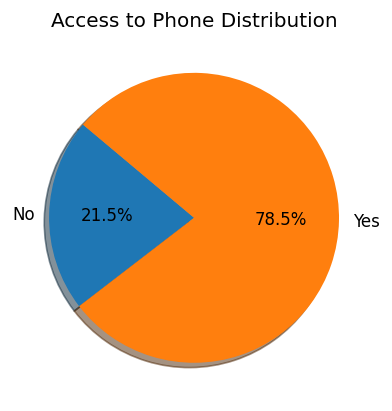

In [28]:
size = data.groupby(['Cell Phone Access'])['household_size'].sum()
status = ['No',  'Yes']
plt.figure(dpi = 120)
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Access to Phone Distribution')
plt.show()

majority of the respondents had access to a phone.

No     18330
Yes     3084
Name: Has a Bank account, dtype: int64


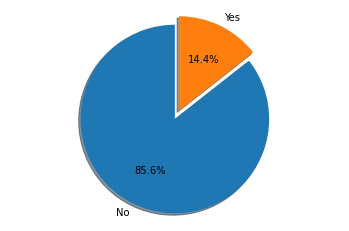

In [29]:
#Getting the proportion of the people with or without bank account
df_bank=data['Has a Bank account'].value_counts()
print(df_bank)
labels=['No', 'Yes']
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(df_bank, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

Majority of the respondents had no bank account.

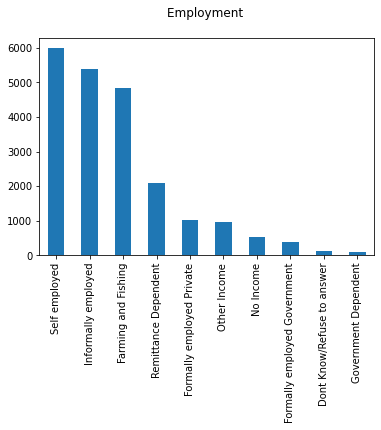

In [30]:
data['Type of Job'].value_counts().plot.bar(title='Employment \n')

Highest number of respondents were self employed.

Female    12602
Male       8812
Name: gender_of_respondent, dtype: int64


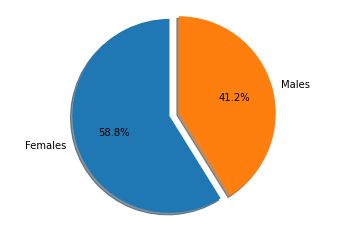

In [31]:
#Getting the proportion of gender represendent in the data
df_bank=data['gender_of_respondent'].value_counts()
print(df_bank)
labels=['Females', 'Males']
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(df_bank, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

Most respondents were females

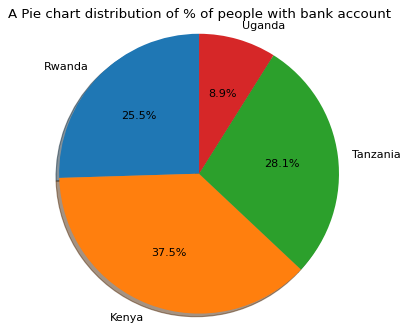

In [32]:
bank =data.groupby(['country'])['Has a Bank account'].count()
label = ['Rwanda','Kenya','Tanzania','Uganda']
label

plt.figure(figsize=(5,5),dpi=80)
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 90)
plt.axis('equal')
plt.title('A Pie chart distribution of % of people with bank account')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


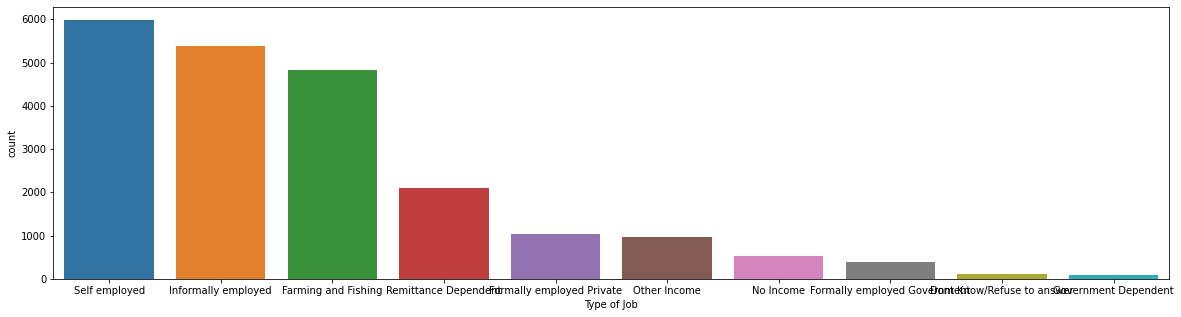

In [33]:
# Plotting categorical data
plt.figure(figsize=(20, 5))
sns.countplot(data['Type of Job'].dropna(), order = data['Type of Job'].value_counts().index);

# Bivarient Analysis

                    year  household_size  Respondent Age
year            1.000000       -0.089009       -0.035643
household_size -0.089009        1.000000       -0.043959
Respondent Age -0.035643       -0.043959        1.000000


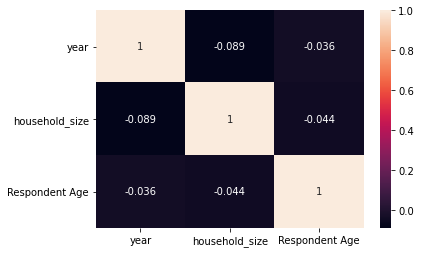

In [34]:
#Getting the correction between numerical data
print(data.corr())
sns.heatmap(data.corr(),annot=True)
plt.show()

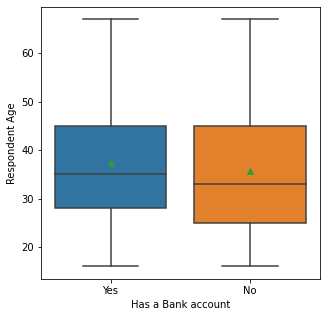

In [35]:
#Relationship between has a bank and Respondent age
plt.figure(figsize=(5,5))
sns.boxplot(x = 'Has a Bank account', y = 'Respondent Age', data=data,showmeans=True)

Observations:
   
*  As seen in the heatmap and evident in pearsons correlation, there is very weak negative correlation between respondent age and household size



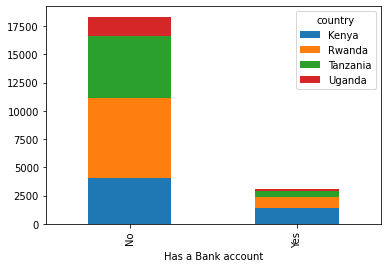

In [36]:
#Plot of number of individuals that has a bank account per country
data.groupby('Has a Bank account')['country'].value_counts().unstack().plot.bar(stacked=True)

The largest number of individuals with bank accounts are from Kenya, followed by those from Rwanda. Majority of respondents without bank accounts are from Rwanda followed by Tanzania

**Tidying Up the data**

In [37]:
# Identify Rows with don't know/ refuse to answer responses 
index_marital_status = data[data['marital_status'] == 'Dont know'].index.to_list()
index_education = data[data['Level of Education'] == 'Other/Dont know/RTA'].index.to_list()
index_job = data[data['Type of Job'] == 'Dont Know/Refuse to answer'].index.to_list()

to_drop = set(index_education + index_marital_status + index_job)
# Drop rows with identified indices
data.drop(index=to_drop, inplace=True)
print(data.shape)

(21285, 13)


To be able to have correct data analysis, records with responses like  don't know/refuse responses in the marital status, education level and job type columns are to be dropped.

**Relationship between Type of Job and having a bank account**

---



Hypothesis:

*   H0: There is a no correlation between type of job and the having a bank account.
*   H1: There is a correlation between type of job and having a bank account.



In [38]:
# Crosstablating  between Type of Job and having a bank account
df_job = pd.crosstab(data['Has a Bank account'], data['Type of Job'])
df_job

Type of Job,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
Has a Bank account,,,,,,,,,
No,4270,86,465,76,4947,523,802,1888,5165
Yes,558,294,560,20,428,12,166,209,816


In [39]:
#Using Chi-square to test the hypothesis
# Significance level is =0.05
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(df_job.to_numpy())

prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 15.50731305586545, Test statistic: 2891.897854134587
Alpha: 0.050000000000000044, p-value: 0.0


The p-value is less than alpha, hence we shall reject the null hypothesis and conclude that there is a correlation between the type of job and having a bank account.

**Relationship between level of education and having a bank account**

Ho: Level of education has no influences one to have a bank account.

H1: Level of education has influence to one having a bank account.

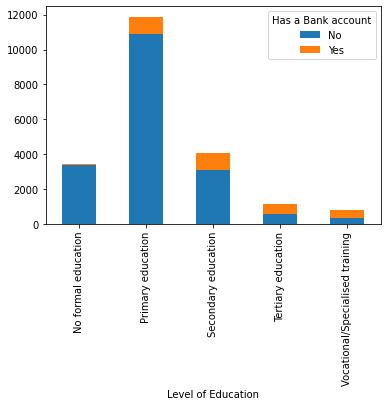

In [40]:
#Plotting Level of education aganist has a bank account
data.groupby('Level of Education')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)

In [41]:
df_cell = pd.crosstab(data['Has a Bank account'], data['Cell Phone Access'])
df_cell

Cell Phone Access,No,Yes
Has a Bank account,,
No,4976,13246
Yes,62,3001


From the Analysis it evident that any individual with a cell phone is likely to have a bank account.

**Realtionship with Level of Education**

In [42]:
#Using Chi-square to test the hypothesis
#Getting the data via cross tabs
df_education = pd.crosstab(data['Has a Bank account'], data['Level of Education'])

stat, p, dof, expected = chi2_contingency(df_education.to_numpy())

prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 9.487729036781154, Test statistic: 3345.8806781727753
Alpha: 0.050000000000000044, p-value: 0.0


In [43]:
#Using T test 
from scipy.stats import ttest_ind
x= data['Has a Bank account'].value_counts()
y= data['Level of Education'].value_counts()

t_statistic, p_value = ttest_ind(x, y)
# Then displaying the t-statistic and p value
print("P Value",p_value)
print(" T statistic",t_statistic)

P Value 0.27687300862418324
 T statistic 1.219973527678489


The p value is less than alpha value hence we reject the null hypothesis and conclude that level of education has influence to an individual having a bank aacount.

**Relationship With type of location of individual**



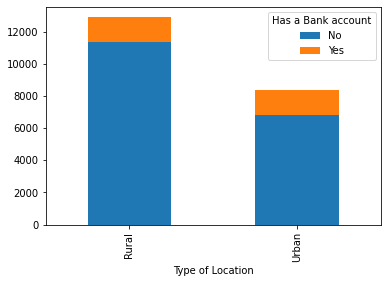

In [44]:
#Visulizing the data
data.groupby('Type of Location')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)

Majority of the individuals with and without bank account are from Rural areas.

In [45]:
#How many people were from urban areas and had a bank account 
data[(data['Type of Location'] == 'Rural') & (data['Has a Bank account'] == 'Yes')].groupby('country')['country'].count().sort_values(ascending= False)

country
Rwanda      586
Kenya       510
Tanzania    360
Uganda       54
Name: country, dtype: int64

**Relationship with Gender**

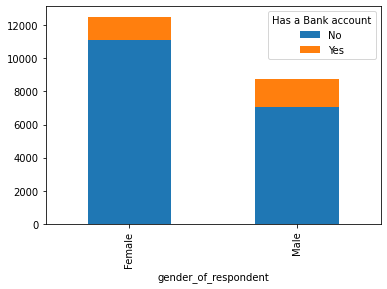

In [46]:
data.groupby('gender_of_respondent')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)


Majority of respondents with a bank account as well as without a bank account are females

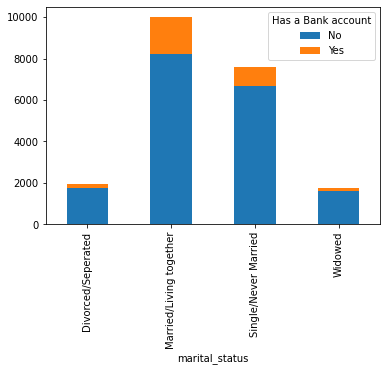

In [47]:
data.groupby('marital_status')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)

The largest percentage of individuals with bank accounts and without bank accounts are married/living together.



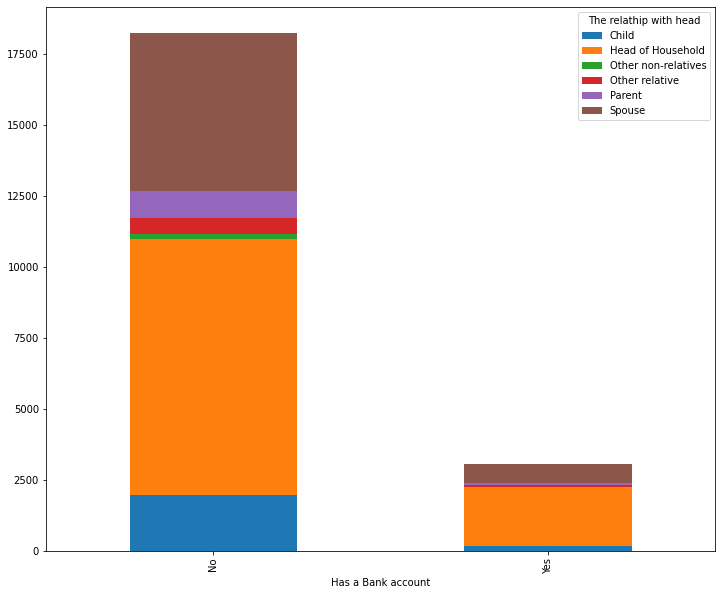

In [48]:
pd.crosstab(data['Has a Bank account'], data['The relathip with head']).plot(kind='bar', stacked=True, figsize=(12,10))

The majority of respondents with a bank account as well as without a bank account are heads of hoseholds

In [49]:
cat_cols

['country',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Education',
 'Type of Job']

# Multivarient Analysis

Text(0.5, 1.0, 'Respondents with no bank accounts')

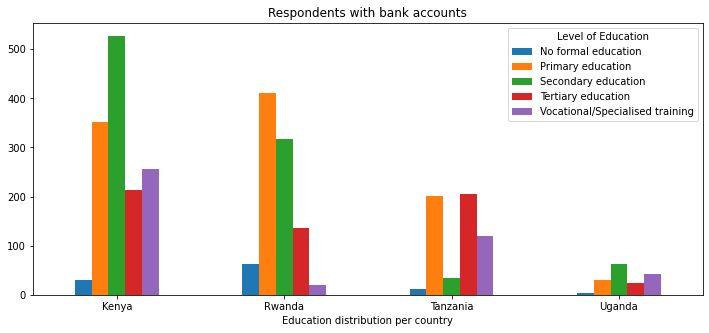

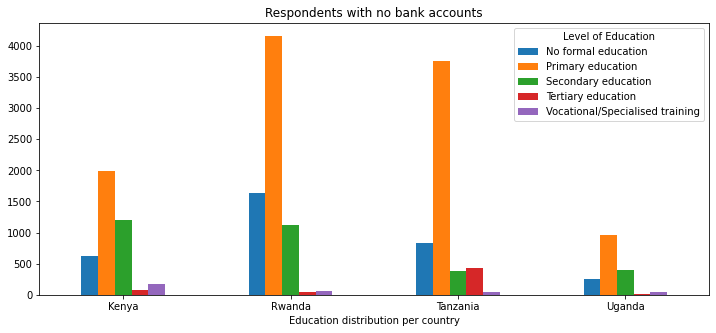

In [50]:
# Investigate relationship between country, level of education and bank account status
country_edu = pd.crosstab(index=[data['Has a Bank account'],data['country']], columns=data['Level of Education'])

country_edu.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,5))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with bank accounts')

country_edu.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,5))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with no bank accounts')

The level of education with the highest number of respondents with bank accounts per country:

*  Kenya : Secondary Education
*  Rwanda : Primary education
*  Tanzania : Primary/Tertiary Education
*  Uganda : Secondary education

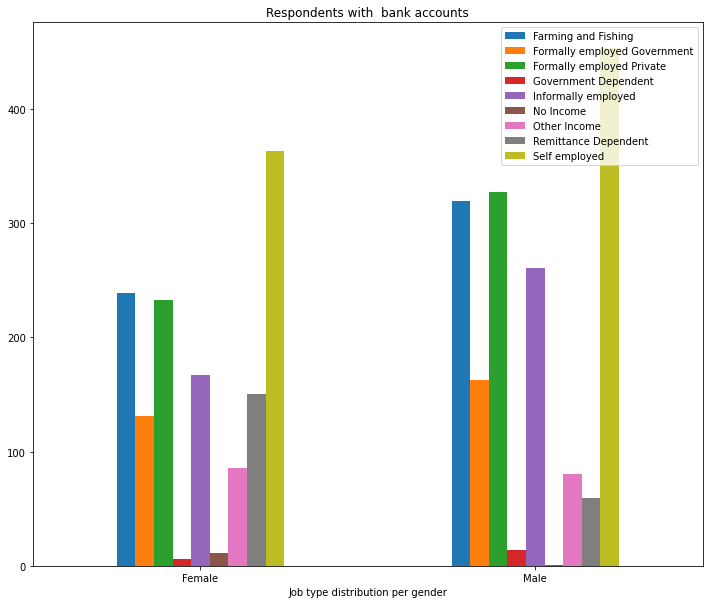

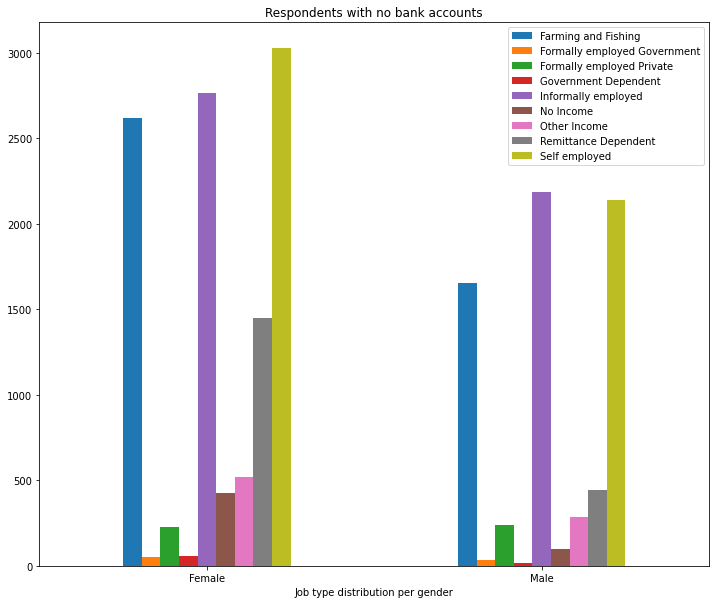

In [51]:
# Investigate relationship between gender, type of jon and bank account status
gender_job = pd.crosstab(index=[data['Has a Bank account'],data['gender_of_respondent']], columns=data['Type of Job'])

gender_job.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with  bank accounts')
plt.legend(loc='upper right')

gender_job.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

For both women and men, the highest number of respondents that had bank accounts were self employed. Other jobs that had a highest propotion of respondents with have bank accounts were: Farming and fishing, Formally employed private, Informally employed

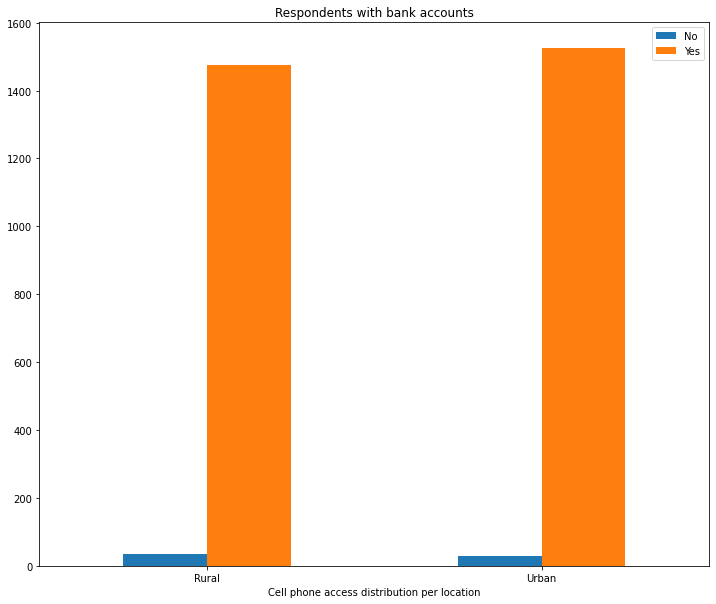

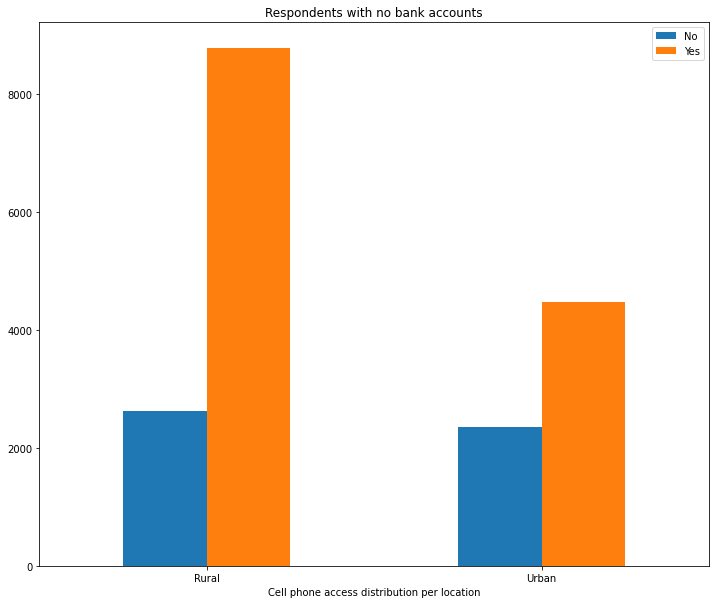

In [52]:
# Investigate relationship between cell access, location and bank account status
loc_cell = pd.crosstab(index=[data['Has a Bank account'],data['Type of Location']], columns=data['Cell Phone Access'])

loc_cell.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

loc_cell.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

Irrespective of the location, the number of individuals with bank aacount was similiar.

**Summary of Findings**

The proportion of individuals with no bank accounts is extremely high in comparison to those with that have a bank account. 85% of all respondents have no bank accounts.

The categorical demographic factors such as gender, job type, location as well as accesss to a cellphone having a significant impact on whether an individual has an account or not.


**Follow up Questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data? YES

b). Do we need other data to answer our question? NO

c). Did we have the right question? YES